In [1]:
import matplotlib.pyplot as plt
from  sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y=make_circles(n_samples=500,noise=0.02)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


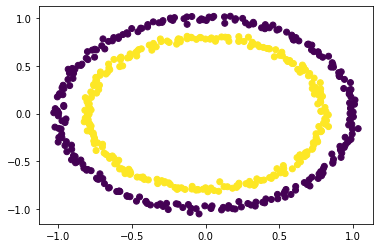

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
#Convert [x1,x2]  to [x1,x2,x3]  where X3=x1**2 +x2**2

In [6]:
def phi(X):
    """Non Linear Transformation"""
    x1=X[:,0]
    x2=X[:,1]
    x3=x1**2 +x2**2
    
    x_=np.zeros((X.shape[0],3))
    print(x_.shape)
    
    x_[:,:-1]=X
    x_[:,-1]=x3
    
    return x_

    

In [7]:
x_=phi(X)

(500, 3)


In [8]:
print(X[:3,:])

[[-0.78860083 -0.11283415]
 [ 0.78076198 -0.19025635]
 [-1.00395986  0.02944725]]


In [9]:
print(x_[:3,:])

[[-0.78860083 -0.11283415  0.63462281]
 [ 0.78076198 -0.19025635  0.64578675]
 [-1.00395986  0.02944725  1.00880254]]


In [10]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    x1=X[:,0]
    x2=X[:,1]
    x3=X[:,2]
    
    ax.scatter(x1,x2,x3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    
    

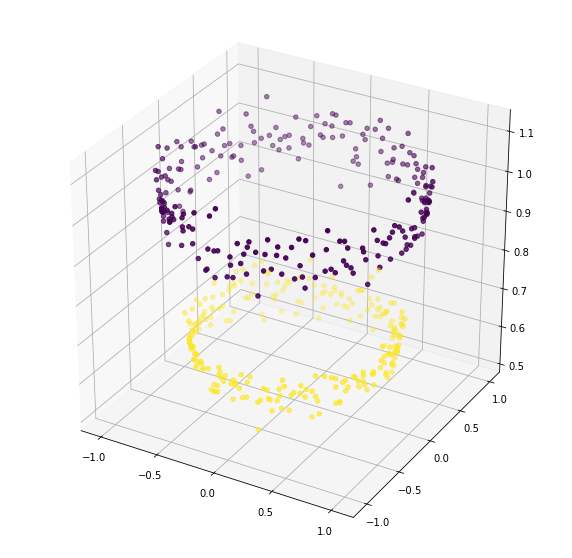

In [11]:
plot3d(x_)

## Logistic Classifier 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [13]:
lr=LogisticRegression()

In [14]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f" %(acc*100))

Accuracy X(2D) is 42.8000


In [15]:
#Not a good classifier for 2D case

## Logistic Classifier on Higher Dimension Space

In [16]:
acc =cross_val_score(lr,x_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f" %(acc*100))

Accuracy X(2D) is 100.0000


## Visualise the Decision Surface

In [17]:
lr.fit(x_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
wts=lr.coef_
print(wts)

[[ 6.11238293e-03  3.02550607e-02 -1.08632746e+01]]


In [19]:
bias=lr.intercept_  #gives bias
print(bias)

[8.89565783]


In [20]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [21]:
 z=-(wts[0,0]*xx+wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81217895 0.81274161 0.81330428 0.81386694]
 [0.81496403 0.81552669 0.81608935 0.81665202]
 [0.8177491  0.81831177 0.81887443 0.8194371 ]
 [0.82053418 0.82109684 0.82165951 0.82222217]]


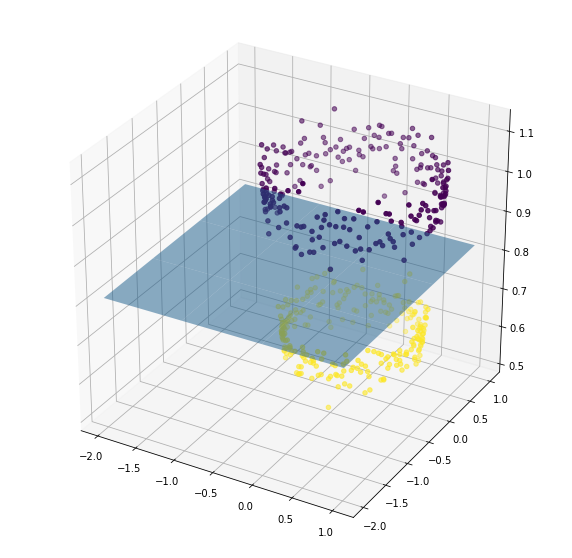

In [22]:
ax=plot3d(x_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()

# Kernel Based Classifcation in SVM

Sklearn supports the following types of Kernels, which can be used in many-real life problems.

* Linear Kernel
* RBF Kernel
* Polynomial Kernel
* Sigmoid Kernel
##### Kernel trick is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

##### Blog on Kernel Trick!! ->
[Medium blog on Kernel Functions](https://towardsdatascience.com/kernel-function-6f1d2be6091)


[](https://towardsdatascience.com/kernel-function-6f1d2be6091)

In [28]:
from sklearn import svm

* SVC        ->SVC with kernel
* NuSVC      -> specially to reduce support vectors
* Linear SVC -> Similar to Pegasos Algorithm

## Linear Kernel SVM

In [35]:
svc=svm.SVC(kernel="linear")

In [36]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
svc.score(X,Y)  #50% accuracy-> bad! 

0.502

## RBF Kernel SVM

In [29]:
svc=svm.SVC()

In [32]:
svc.fit(X,Y)   #Using RBF kernel ->gives 100% accuracy

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
svc.score(X,Y)

1.0

## Polynominal Kernel

In [43]:
svc=svm.SVC(kernel='poly')

In [44]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
svc.score(X,Y)

0.574

## Custom Kernel

In [50]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc=svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Mathematical Formulation Resources

[](https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation)

[https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation]

[https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation]